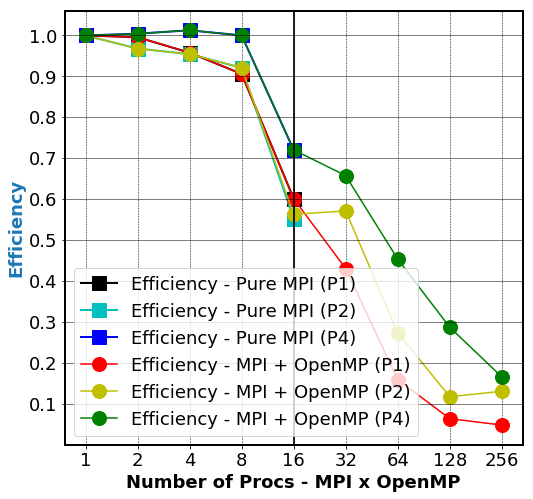

In [8]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw



#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico 
BASE_PATH = os.getcwd() 
PATH_SVG=BASE_PATH+"/../../inkscape/cap6/"
PATH_EPS=BASE_PATH+"/../../eps/cap6/"
fname = "cdl_linear_mpi-openmp_efficiency"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
PLOT_FIG = True
SAVE_FIG = False 
#########################################################################


#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method
df = pd.read_csv('./data/cdl_linear_mpi-openmp.csv')
##### Resultado para CentralDifferenceLinear Local Method - Multiplicate Operations 
#df = pd.read_csv('./data/cdl_linear_multiplicate_mpi-openmp.csv')
# df = df[:-1]
pd.set_option('expand_frame_repr', False)

#   Aloca figura para permitir alteracao
fig, ax = plt.subplots()

#   Plota os labels
plt.tight_layout()
title = 'Central Difference Linear Local'
subtitle = 'Multiplicate Methods with OpenMP\n'
# plt.suptitle(title, y=0.97, fontsize=20, fontweight='bold', ha='center', va='center')
# plt.title(subtitle, x=0.48, fontsize=16, ha='center', va='center')
# plt.subplots_adjust(top=0.90)
color='tab:blue'
ax.set_xlabel('Number of Procs - MPI x OpenMP', fontweight='bold')
ax.set_ylabel('Efficiency', fontweight='bold', color=color)
# ax2.set_ylabel('Efficiency - MPI x OpenMP', fontweight='bold', color=color)

#   Define a escala do grafico
plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
# print(df.columns)
aggregate_operations = {
    'Num. Procs. MPI x OpenMP':'first', 
    'Efficiency - Pure MPI (P1)':'max', 
    'Efficiency - Pure MPI (P2)':'max', 
    'Efficiency - Pure MPI (P4)':'max',
    'Efficiency - MPI + OpenMP (P1)':'max', 
    'Efficiency - MPI + OpenMP (P2)':'max', 
    'Efficiency - MPI + OpenMP (P4)':'max'
}
df = df.groupby('Num. Procs. MPI x OpenMP').agg(aggregate_operations)
# print(df)

#   Plotar os valores dos graficos
plt.plot(df['Num. Procs. MPI x OpenMP'], df['Efficiency - Pure MPI (P1)'], marker='s', markersize=14, color='k', linewidth=2)
plt.plot(df['Num. Procs. MPI x OpenMP'], df['Efficiency - Pure MPI (P2)'], marker='s', markersize=14, color='c', linewidth=2)
plt.plot(df['Num. Procs. MPI x OpenMP'], df['Efficiency - Pure MPI (P4)'], marker='s', markersize=14, color='b', linewidth=2)

color = 'tab:red'
plt.plot(df['Num. Procs. MPI x OpenMP'], df['Efficiency - MPI + OpenMP (P1)'], marker='o', markersize=14, color='r')
plt.plot(df['Num. Procs. MPI x OpenMP'], df['Efficiency - MPI + OpenMP (P2)'], marker='o', markersize=14, color='y')
plt.plot(df['Num. Procs. MPI x OpenMP'], df['Efficiency - MPI + OpenMP (P4)'], marker='o', markersize=14, color='g')

#   Configura os labels em 'x' e 'y'
n=256
values_multiples_2 = [ 2**i for i in range(0,int(math.log(n,2))+1) ]
str_values_multiples_2 = [ str(i) for i in values_multiples_2 ]
plt.xticks(values_multiples_2, str_values_multiples_2)

#   y - left
n=1.1
values_y = np.arange(0.1,n,0.1)
str_values_y = [ str(round(i,1)) for i in values_y ]
plt.yticks(values_y, str_values_y)
# ax.set_yticks(values_y, str_values_y)


# ax2.set_yticks(values_y, str_values_y)

# #   y - right
# plt.yticks(values_y, str_values_y)


#  Define as linhas do grid
ax.xaxis.grid(True, linestyle='--', color='k', linewidth='0.5')
lines = np.arange(0.1,n,0.1)
for i in lines:
    ax.axhline(i, linestyle='-', color='k', linewidth='0.5') # horizontal lines
ax.axvline(16, linestyle='-', color='k', linewidth='1.7')

# lines = np.arange(1,256+1,1)
# for i in lines:
#     if (i in values_multiples_2):
#         ax2.axhline(i, linestyle='-', color='dimgrey', linewidth='1.5') # horizontal lines

#   Plota a legenda e o tamanho da figura
# ax1.legend(loc=(0, .8), frameon = False)
# ax2.legend(loc=(0, .65), frameon = False)
plt.legend()
fig.set_size_inches(8, 8)

#   Exibe a figura
if (PLOT_FIG):
    plt.show()

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')
